<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/main/Shironin%20Igor/2_%22%D1%81%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_2%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tensorflow as tf
# from tensorflow import keras

# Библиотеки

In [ ]:
# Работа с массивами
import numpy as np
import random                             # Генерация случайных чисел
import pandas as pd
# Генератор аугментированных изображений
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Основа для создания последовательной модели
from tensorflow.keras.models import Sequential
# Основные слои
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# Оптимизатор
from tensorflow.keras.optimizers import Adam
# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Подключение модуля для загрузки данных из облака
import gdown
# Инструменты для работы с файлами
import os
# Отрисовка графиков
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance       # Инструменты для работы с изображениями
import math                               # Математические функции
import  requests, zipfile
!pip install GitPython
from sklearn.model_selection import train_test_split
# Рисование графиков в ячейках Colab
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.6/188.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00


# Загрузка изображений

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# открываем доступ к файлу и получаем ссылку
# https://drive.google.com/file/d/1Ku1Dw9CTQOSvhd5nmkRDb1x70-F4Ttug/view?usp=sharing
f_1 = '1Ku1Dw9CTQOSvhd5nmkRDb1x70-F4Ttug'# нужна только эта часть ссылки
gdown.download(f'https://drive.google.com/uc?id={f_1}', None, quiet=True)

'img.zip'

In [ ]:
# Разархивация датасета в директорию 'content/TOTAL_folder'
!unzip -qo "img.zip" -d /content/img

Комбинированный 250/:  mismatching "local" filename (╨Ъ╨╛╨╝╨▒╨╕╨╜╨╕╤А╨╛╨▓╨░╨╜╨╜╤Л╨╣ 250/),
         continuing with "central" filename version
Комбинированный 250/aigner-ea317-423-s2-1 (3).jpg:  mismatching "local" filename (╨Ъ╨╛╨╝╨▒╨╕╨╜╨╕╤А╨╛╨▓╨░╨╜╨╜╤Л╨╣ 250/aigner-ea317-423-s2-1 (3).jpg),
         continuing with "central" filename version
Комбинированный 250/aigner-ea317-423-s2-2 (2).jpg:  mismatching "local" filename (╨Ъ╨╛╨╝╨▒╨╕╨╜╨╕╤А╨╛╨▓╨░╨╜╨╜╤Л╨╣ 250/aigner-ea317-423-s2-2 (2).jpg),
         continuing with "central" filename version
Комбинированный 250/alexander-mcqueen-amq4257-8sm-s2-1 (3).jpg:  mismatching "local" filename (╨Ъ╨╛╨╝╨▒╨╕╨╜╨╕╤А╨╛╨▓╨░╨╜╨╜╤Л╨╣ 250/alexander-mcqueen-amq4257-8sm-s2-1 (3).jpg),
         continuing with "central" filename version
Комбинированный 250/alexander-mcqueen-amq4257-8sm-s2-2 (2).jpg:  mismatching "local" filename (╨Ъ╨╛╨╝╨▒╨╕╨╜╨╕╤А╨╛╨▓╨░╨╜╨╜╤Л╨╣ 250/alexander-mcqueen-amq4257-8sm-s2-2 (2).jpg),
         continuing with "central" filename version
К

In [ ]:
!rm /content/img/Комбинированный\ 250/desktop.ini
!rm /content/img/Металл\ 418/desktop.ini
!rm /content/img/Пластик\ 500/desktop.ini

In [ ]:

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/img/'
os.listdir(IMAGE_PATH)

['Пластик 500', 'Комбинированный 250', 'Металл 418']

# Cоздание списков путей к файлам и меток к ним

In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH)) # можно не сортировать CLASS_LIST = os.listdir(IMAGE_PATH)
# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)
# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 3, метки классов: ['Комбинированный 250', 'Металл 418', 'Пластик 500']


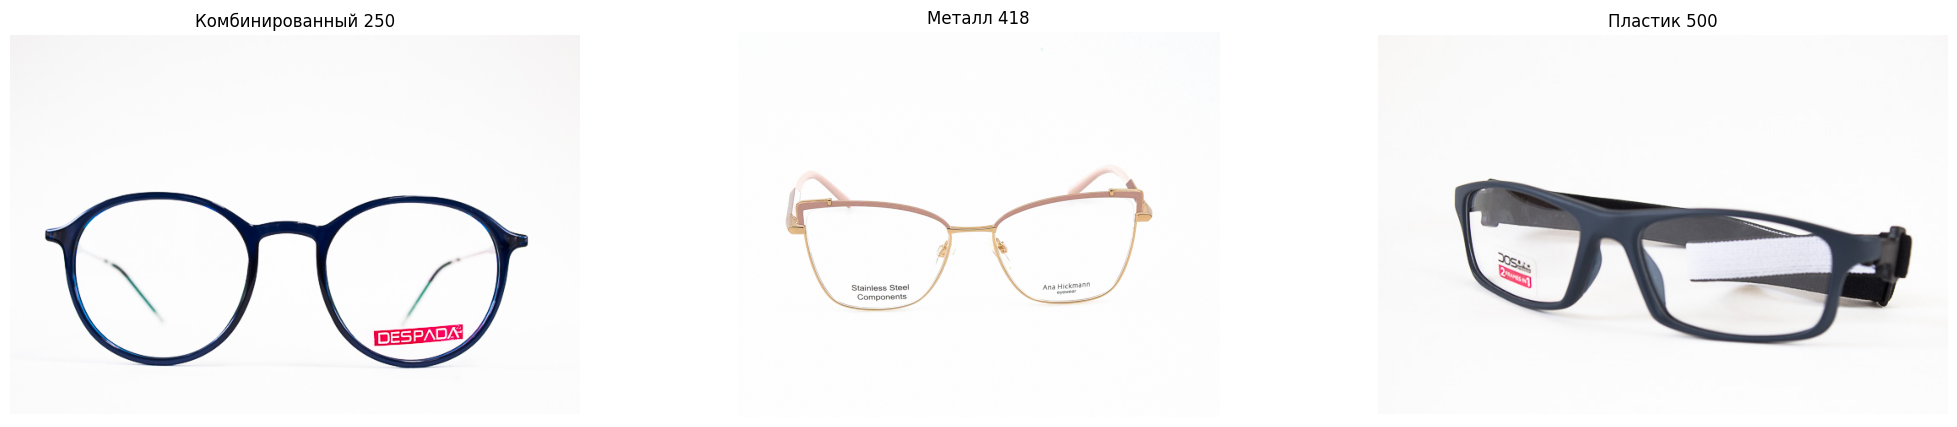

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(25, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):
    # Формирование пути к папке содержимого класса
    path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'
    # Выбор случайного фото из i-го класса
    img_path = path + random.choice(os.listdir(path))
    # Отображение фотографий
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [ ]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам


for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)
    print('Общий размер базы для обучения:', len(data_labels))

Размер класса Комбинированный 250 составляет 514 фото
Общий размер базы для обучения: 514
Размер класса Металл 418 составляет 418 фото
Общий размер базы для обучения: 932
Размер класса Пластик 500 составляет 499 фото
Общий размер базы для обучения: 1431


# просмотр фото

(900, 600)
2


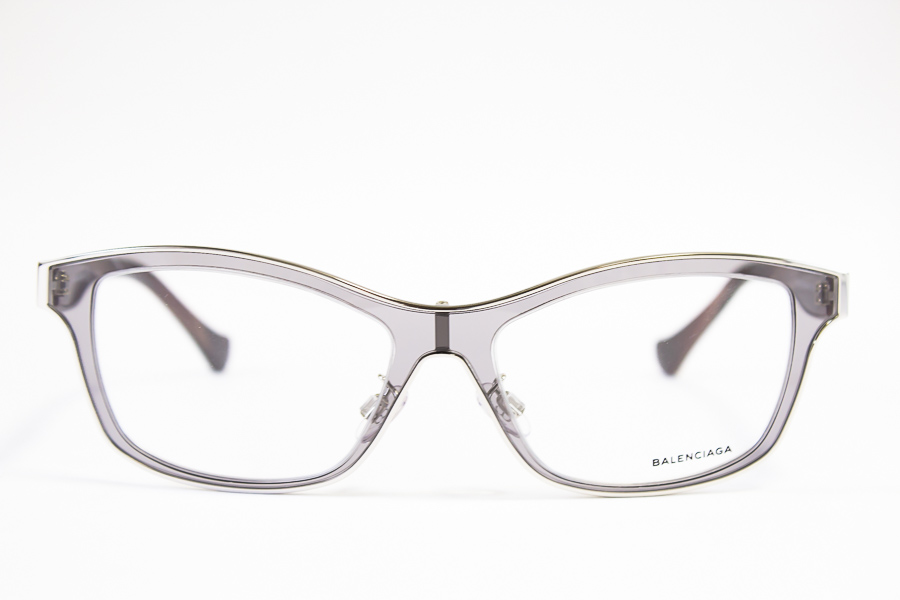

In [ ]:
img  = Image.open(data_files[1300])
print(img.size)
print(data_labels[1300])
img

# Получение списка файлов data_img c размерностью 128х64

In [ ]:
IMG_WIDTH           = 128       # Ширина изображения для нейросети
IMG_HEIGHT          = 64      # Высота изображения для нейросети

In [ ]:
data_img = []
for i in range(len(data_files)):
  img_old  = Image.open( data_files[i])
  img = img_old.resize((IMG_WIDTH ,IMG_HEIGHT ))
  data_img.append(img)

In [ ]:
img1 = data_img[5]

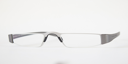

In [ ]:
img1

# Создание аугментированного списка изображений

In [ ]:
# Сравнение двух изображений
def show_image_pair(img1, img2): #
    # Cоздание полотна для рисования двух изображений
    fig, axs = plt.subplots(1, 2, figsize=(4, 2))
    # Исходное изображение
    axs[0].imshow(img1)
    axs[0].axis('off')
    # Модифицированное изображение
    axs[1].imshow(img2)
    axs[1].axis('off')
    # Вывод изображений
    plt.show()

In [ ]:
# подрезка изображения чтобы небыло черных углов
def rotated_rect(w,                       # Ширина изображения
                 h,                       # Высота изображения
                 angle                    # Угол поворота в градусах
                 ):
    angle = math.radians(angle)
    width_is_longer = w >= h
    side_long, side_short = (w,h) if width_is_longer else (h,w)

    sin_a, cos_a = abs(math.sin(angle)), abs(math.cos(angle))

    if side_short <= 2.*sin_a*cos_a*side_long or abs(sin_a-cos_a) < 1e-10:
        x = 0.5 * side_short
        wr, hr = (x/sin_a, x/cos_a) if width_is_longer else (x/cos_a, x/sin_a)
    else:
        cos_2a = cos_a*cos_a - sin_a*sin_a
        wr, hr = (w*cos_a - h*sin_a)/cos_2a, (h*cos_a - w*sin_a)/cos_2a

    return wr, hr # Ширина и Высота прямоугольника обрезки

In [ ]:
 # функция поворота на случайный угол (в градусах) с учетом необходимой обрезки
 # + востановление размеров
def random_rot(x,      # Подаваемое изображение
               ang                        # Максимальный угол поворота
               ):
    # Случайное значение угла в диапазоне [-ang, ang]
  a = random.uniform(-1., 1.) * ang
    # Вращение картинки с расширением рамки
  r = x.rotate(a, expand=True)
    # Вычисление размеров прямоугольника обрезки максимальной площади
    # для размеров исходной картинки и угла поворота в градусах
  crop_w, crop_h = rotated_rect(x.width, x.height, a)
    # Обрезка повернутого изображения и возврат результата
  w, h = r.size
  y = r.crop(((w - crop_w)*0.5, (h - crop_h)*0.5,
                   (w + crop_w)*0.5, (h + crop_h)*0.5))
  y = y.resize((x.width,x.height))
  return y              # Полученное изображение

In [ ]:
from PIL import ImageEnhance

In [ ]:
def random_contrast(x,                    # Подаваемое изображение
                    level                 # Максимальное отклонение коэффициента контраста от нормы - число от 0. до 1.
                    ):
    enh = ImageEnhance.Contrast(x)        # Создание экземпляра класса Contrast
    factor = random.uniform(1. - level,
                            1. + level)   # Cлучайный коэффициент контраста из указанного интервала
    return enh.enhance(factor)            # Получаемое изображение с изменением коэффициента контраста

In [ ]:
def random_brightness(x,                  # Подаваемое изображение
                      level               # Максимальное отклонение коэффициента яркости от нормы - число от 0. до 1.
                      ):
    enh = ImageEnhance.Brightness(x)      # Создание экземпляра класса Brightness
    factor = random.uniform(1. - level,
                            1. + level)   # Cлучайный коэффициент яркости из указанного интервала
    return enh.enhance(factor)             # Получаемое изображение с изменением коэффициента яркости

In [ ]:
def  trans_img(img1) :
  img2 = img1.transpose(Image.FLIP_LEFT_RIGHT) # отражение
  return img2

In [ ]:
ang = 10
level = 0.4

In [ ]:
def aug (img, ang, level):
    # Cоздание списка модификаций
  mod_oper = [random_rot(img,ang),
                trans_img(img),
                random_contrast(img,level),
                random_brightness(img,level)]

    # Cлучайное количество изменений из списка; минимум одно изменение
  mod_count = random.randrange(len(mod_oper) + 1)

    # Случайный отбор индексов изменений в количестве mod_count без повторений
  mod_list = random.sample(range(len(mod_oper)), mod_count)

    # Применение модификаций по индексам из mod_list
  for mod_index in mod_list:
        img = mod_oper[mod_index]

    # Возврат результата
  return img

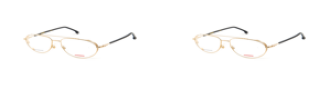

In [ ]:
img1 = data_img[100]
img2 = aug(img1,ang, level)
show_image_pair(img1, img2)

In [ ]:
# функция для получения списка из n аугментированых изображений + родное
# со списком одинаковых меток например '50.jpg'

def aug_list(img, n, mark):
  img_list = [img]
  a_list = [mark]
  for i in range(n):
    img_list += [aug(img,ang,level)]
    a_list.append(mark)
  return img_list , a_list

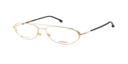

In [ ]:
n = 5
a,b = aug_list(img1,n,5)
a[3]

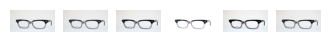

[2, 2, 2, 2, 2, 2]

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(4, 2))

a,b  = aug_list(data_img[1000],5,data_labels[1000])
for i in range(6):
    # Исходное изображение
  axs[i].imshow(a[i])
  axs[i].axis('off')

#     # Вывод изображений
plt.show()
b

In [ ]:
def aug_list_n (img_list,mark_list, n) :
  data_x = []
  data_y = []
  for i in range(len(img_list )):
    list_img ,list_a = aug_list(img_list[i],n-1,mark_list[i])
    for j in range(len(list_img )):
       data_x.append(list_img[j])
       data_y.append(list_a[j])
  return data_x, data_y

In [ ]:
data_x, data_y = aug_list_n (data_img,data_labels, n)


In [ ]:
print(data_x[1000].size)
print(len(data_x))
data_x[1000:1005]

(128, 64)
7155


[<PIL.Image.Image image mode=RGB size=128x64>,
 <PIL.Image.Image image mode=RGB size=128x64>,
 <PIL.Image.Image image mode=RGB size=128x64>,
 <PIL.Image.Image image mode=RGB size=128x64>,
 <PIL.Image.Image image mode=RGB size=128x64>]

In [ ]:
print(len(data_y))
data_y[1000]

7155


0

# Подготовка выборок

In [ ]:
print(data_x[1000].size)

# Преобразовать список в массив
data_images = np.array([np.array(img) for img in data_x])/255

# Проверить размерность
print(data_images.shape)

(128, 64)
(7155, 64, 128, 3)


In [ ]:
# from tensorflow.keras.preprocessing import image
# data_images = []
# for i in range(len(data_files)):
#   # изменение размера и нормализация
#   img  = np.array(image.load_img(data_files[i], target_size=(128, 64)))/255
# # создание общего спика изображений
#   data_images +=[img]

In [ ]:

print(data_images[600].shape)
print(data_y[600])
data_images[600]

(64, 128, 3)
0


array([[[0.93333333, 0.92941176, 0.91764706],
        [0.9372549 , 0.93333333, 0.91764706],
        [0.9372549 , 0.93333333, 0.92156863],
        ...,
        [0.94117647, 0.9372549 , 0.92941176],
        [0.94117647, 0.9372549 , 0.92941176],
        [0.9372549 , 0.93333333, 0.9254902 ]],

       [[0.9372549 , 0.93333333, 0.9254902 ],
        [0.9372549 , 0.93333333, 0.92156863],
        [0.94117647, 0.9372549 , 0.92156863],
        ...,
        [0.94117647, 0.9372549 , 0.92941176],
        [0.94117647, 0.9372549 , 0.92941176],
        [0.9372549 , 0.93333333, 0.9254902 ]],

       [[0.9372549 , 0.93333333, 0.9254902 ],
        [0.94117647, 0.9372549 , 0.9254902 ],
        [0.94117647, 0.9372549 , 0.92941176],
        ...,
        [0.94509804, 0.94117647, 0.93333333],
        [0.94117647, 0.9372549 , 0.92941176],
        [0.9372549 , 0.93333333, 0.9254902 ]],

       ...,

       [[0.90588235, 0.89803922, 0.90196078],
        [0.90196078, 0.90196078, 0.90196078],
        [0.90588235, 0

In [ ]:
data_images[1].shape

(64, 128, 3)

In [ ]:
x_data = np.array(data_images)          # Перевод общего списка изображений в numpy-массив
y_data = np.array(data_y)            # Перевод общего списка меток класса в numpy-массив
print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

Общий массив данных изображений следующей формы: (7155, 64, 128, 3)
Общий массив меток классов следующей формы: (7155,)


In [ ]:
# Преобразование данных в формат one_hot_encoding
from tensorflow.keras.utils import to_categorical
y_data = to_categorical(y_data, 3)
y_data[5]

array([1., 0., 0.], dtype=float32)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x_data, # ----------------- датасет с изображениям
                                                    y_data, # ----------------- датасет с метками
                                                    test_size = 0.1, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # ---


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, # ----------------- датасет с изображениям
                                                    y_data, # ----------------- датасет с метками
                                                    test_size = 0.2, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # ---
print(f'Общий массив данных изображений следующей формы: {x_train.shape}')
print(f'Общий массив меток классов следующей формы: {y_train.shape}')
print(f'Общий массив данных проверочных изображений следующей формы: {x_val.shape}')
print(f'Общий массив проверочных меток классов следующей формы: {y_val.shape}')
print(f'Общий массив тестовых данных  изображений следующей формы: {x_test.shape}')
print(f'Общий массив тестовых меток классов следующей формы: {y_test.shape}')


Общий массив данных изображений следующей формы: (5724, 64, 128, 3)
Общий массив меток классов следующей формы: (5724, 3)
Общий массив данных проверочных изображений следующей формы: (1431, 64, 128, 3)
Общий массив проверочных меток классов следующей формы: (1431, 3)
Общий массив тестовых данных  изображений следующей формы: (716, 64, 128, 3)
Общий массив тестовых меток классов следующей формы: (716, 3)


# Cоздание модели

In [ ]:
EPOCHS              = 150         # Число эпох обучения
BATCH_SIZE          = 24                    # Размер батча для обучения модели
OPTIMIZER           = Adam(0.0001)
CLASS_COUNT         = 3

IMG_CHANNELS        = 3

In [ ]:
# Создание последовательной модели
model_conv = Sequential()

# Первый сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH  , IMG_CHANNELS)))
model_conv.add(BatchNormalization())

# Второй сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

# Третий сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(BatchNormalization())
model_conv.add(Dropout(0.2))

# Четвертый сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Dropout(0.2))

# Пятый сверточный слой
model_conv.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_conv.add(BatchNormalization())

# Шестой сверточный слой
model_conv.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Dropout(0.2))

# Слой преобразования многомерных данных в одномерные
model_conv.add(Flatten())

# Промежуточный полносвязный слой
model_conv.add(Dense(2048, activation='relu'))

# Промежуточный полносвязный слой
model_conv.add(Dense(4096, activation='relu'))
# Выходной полносвязный слой с количеством нейронов по количесту классов
model_conv.add(Dense(CLASS_COUNT, activation='softmax'))

In [ ]:
    # Вывод сводки
model_conv.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 128, 256)      7168      
                                                                 
 batch_normalization_9 (Batc  (None, 64, 128, 256)     1024      
 hNormalization)                                                 
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 128, 256)      590080    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 21, 42, 256)      0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 21, 42, 256)       590080    
                                                                 
 batch_normalization_10 (Bat  (None, 21, 42, 256)     

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Создание обратного вызова EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/model/' + 'best_model.h5', monitor='val_accuracy',
                             save_best_only=True, mode='max', verbose=1)

In [ ]:
model_conv.compile(optimizer=OPTIMIZER,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Загрузка обученной модели и дообучение

In [ ]:
from tensorflow.keras.models import load_model

model_conv = load_model("/content/drive/MyDrive/model/best_model.h5")

In [ ]:
 # Обучение модели с заданными параметрами
history = model_conv.fit( x_train,y_train,
                        epochs=EPOCHS  ,
                      batch_size=BATCH_SIZE,
                        validation_data=(x_val, y_val),callbacks=[checkpoint, early_stopping])

Epoch 1/150
239/239 [==============================] - ETA: 0s - loss: 0.1267 - accuracy: 0.9539
Epoch 1: val_accuracy improved from -inf to 0.90985, saving model to /content/drive/MyDrive/model/best_model.h5
239/239 [==============================] - 61s 207ms/step - loss: 0.1267 - accuracy: 0.9539 - val_loss: 0.2974 - val_accuracy: 0.9099
Epoch 2/150
239/239 [==============================] - ETA: 0s - loss: 0.0994 - accuracy: 0.9617
Epoch 2: val_accuracy improved from 0.90985 to 0.92523, saving model to /content/drive/MyDrive/model/best_model.h5
239/239 [==============================] - 52s 218ms/step - loss: 0.0994 - accuracy: 0.9617 - val_loss: 0.2104 - val_accuracy: 0.9252
Epoch 3/150
239/239 [==============================] - ETA: 0s - loss: 0.0748 - accuracy: 0.9686
Epoch 3: val_accuracy improved from 0.92523 to 0.93431, saving model to /content/drive/MyDrive/model/best_model.h5
239/239 [==============================] - 55s 228ms/step - loss: 0.0748 - accuracy: 0.9686 - val_l

In [ ]:
#model.save("model_conv.h5")

In [ ]:
# # /content/drive/MyDrive/model
# model_conv.save(f'/content/drive/MyDrive/model/model_conv2.h5')

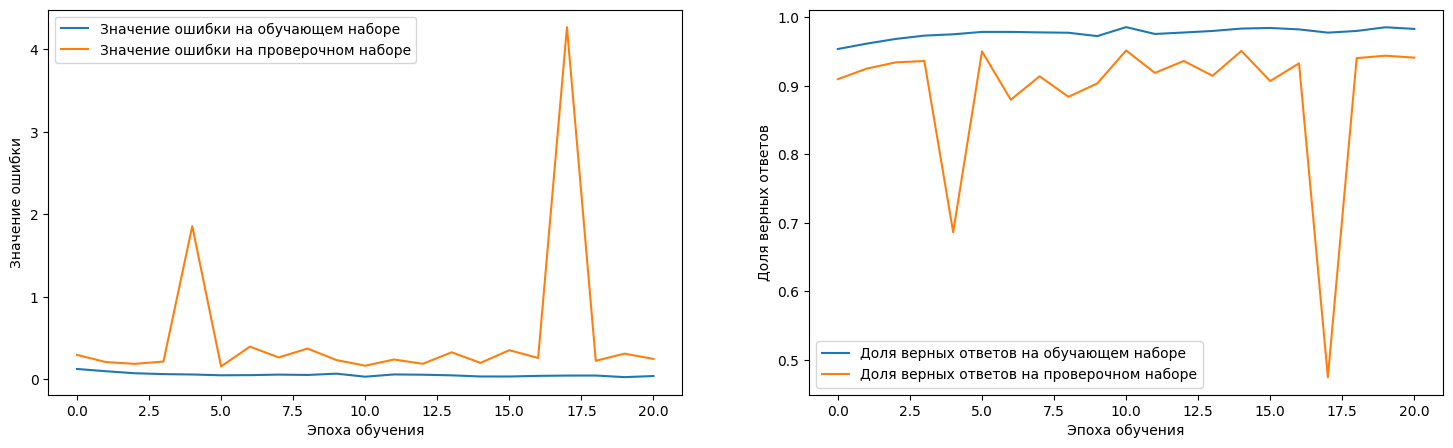

In [ ]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model_conv = load_model("/content/drive/MyDrive/model/best_model.h5")

In [ ]:
scores = model_conv.evaluate(x_test, y_test, verbose=1)

print(scores)
print('Доля верных ответов на тестовых данных, в процентах: {:7.4%}'.format(scores[1]))

23/23 [==============================] - 1s 49ms/step - loss: 0.1730 - accuracy: 0.9497
[0.1730491667985916, 0.9497206807136536]
Доля верных ответов на тестовых данных, в процентах: 94.9721%


In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns